In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display_html

In [2]:
path = 'enem_small_data/'
file = 'Microdados_ENEM_Amostra_'

In [3]:
# Copiei do stack overflow temporariamente

def display_dfs(dfs, names=[]):
    html_str = ''
    if names:
        html_str += ('<tr>' + 
                     ''.join(f'<td style="text-align:center">{name}</td>' for name in names) + 
                     '</tr>')
    html_str += ('<tr>' + 
                 ''.join(f'<td style="vertical-align:top"> {df.head().to_html(index=False)}</td>' 
                         for df in dfs) + 
                 '</tr>')
    html_str = f'<table>{html_str}</table>'
    html_str = html_str.replace('table','table style="display:inline"')
    display_html(html_str, raw=True)

In [4]:
plt.ion()
plt.rcParams['figure.figsize']  = (10, 6)

In [5]:
df = pd.read_csv(path+file+'2018.csv', sep=',',  encoding='latin-1', usecols=[
    'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO',
    'NO_MUNICIPIO_ESC', 'SG_UF_ESC', 'TP_DEPENDENCIA_ADM_ESC']).dropna()
df.loc[:,'Media'] = df[['NU_NOTA_CN', 'NU_NOTA_CH'
                                , 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].sum(axis=1)/len(df[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT','NU_NOTA_REDACAO']].columns)

In [6]:
df

,NO_MUNICIPIO_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,Media
2,Campo Magro,PR,2.0,417.4,481.5,496.5,504.3,320.0,443.94
7,Juazeiro do Norte,CE,2.0,390.9,600.5,598.7,564.5,480.0,526.92
11,Fortaleza,CE,2.0,521.8,602.7,532.8,486.3,440.0,516.72
13,DivinÃ³polis,MG,4.0,640.8,659.4,606.0,736.9,800.0,688.62
28,Olinda,PE,2.0,475.6,432.9,507.7,420.5,300.0,427.34
34,Rio Bananal,ES,2.0,393.9,530.5,466.0,546.8,360.0,459.44
39,SÃ£o Pedro de AlcÃ¢ntara,SC,2.0,381.4,588.7,416.0,474.4,360.0,444.10
60,SÃ£o Paulo,SP,2.0,407.4,605.0,526.8,488.7,580.0,521.58
74,Teresina,PI,2.0,408.2,587.6,487.7,395.0,460.0,467.70
76,Rosana,SP,2.0,521.4,582.2,495.2,499.0,420.0,503.56


In [7]:
estados = df.groupby('SG_UF_ESC', as_index=False).Media.mean().sort_values(by='Media')
estados.head()

,SG_UF_ESC,Media
0,AC,423.780000
12,MT,486.015714
3,AP,490.605714
9,MA,495.758462
2,AM,498.410625


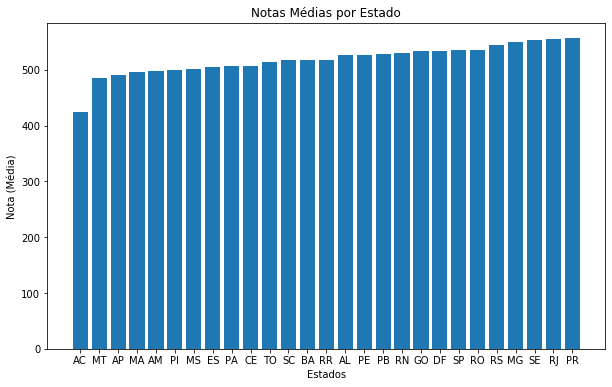

In [13]:
x_pos = [i for i, _ in enumerate(estados['SG_UF_ESC'])]

plt.bar(x_pos, estados['Media'], width=0.8)
plt.xlabel("Estados")
plt.ylabel("Nota (Média)")
plt.title("Notas Médias por Estado")

plt.xticks(x_pos, estados['SG_UF_ESC'])

plt.show()

In [10]:
tipo_escola = df.groupby('TP_DEPENDENCIA_ADM_ESC', as_index=False).Media.mean().sort_values(by='Media')
tipo_escola.head()

,TP_DEPENDENCIA_ADM_ESC,Media
2,3.0,496.213333
1,2.0,504.372946
0,1.0,599.382326
3,4.0,606.026218


[0, 1, 2, 3]


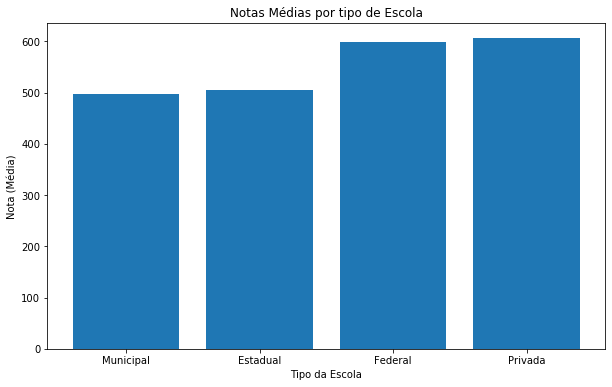

In [19]:
x_pos = [i for i, _ in enumerate(tipo_escola['TP_DEPENDENCIA_ADM_ESC'])]

plt.bar(x_pos, tipo_escola['Media'], width=0.8)
plt.xlabel("Tipo da Escola")
plt.ylabel("Nota (Média)")
plt.title("Notas Médias por tipo de Escola")

plt.xticks(x_pos, ['Municipal', 'Estadual', 'Federal', 'Privada'])
print(x_pos)

plt.show()